<a href="https://colab.research.google.com/github/Seeethy/Markowitz-portfolio-model-/blob/main/Kopia_notatnika_Markowitz_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import pandas_datareader.data as web
from datetime import date
import datetime
from dateutil.relativedelta import relativedelta
import itertools
import matplotlib.pyplot as plt
import pylab as plot
import numpy as np
import pandas as pd
import plotly.express as px 

In [167]:
companies = []
how_many = int(input("How many companies would you like to have in your portfolio?: "))
for c in range(how_many):
  company = input("Type the shortname of the company (it must be searchable in yahoo finance):  ")
  companies.append(company)

companies

How many companies would you like to have in your portfolio?: 3
Type the shortname of the company (it must be searchable in yahoo finance):  FB
Type the shortname of the company (it must be searchable in yahoo finance):  EBAY
Type the shortname of the company (it must be searchable in yahoo finance):  BABA


['FB', 'EBAY', 'BABA']

In [168]:

today = date.today()
end_date = today.strftime("%Y-%m-%d")
two_years_from_today = date.today() - relativedelta(years=5)
start_date = two_years_from_today.strftime("%Y-%m-%d")
data_source= 'yahoo'

start_date = "2016-11-01"
end_date = "2020-09-01"

data_list = []
for i in range(len(companies)):
  data = web.DataReader(companies[i], data_source, start_date, end_date)
  data_list.append(data)

data = web.DataReader(companies, data_source, start_date, end_date)
adj_close = data["Adj Close"]
index = adj_close.index
dataa['High']

Symbols,BABA,EBAY
Date,,
2016-11-01,101.239998,28.700001
2016-11-02,104.099998,28.510000
2016-11-03,99.300003,28.450001
2016-11-04,98.790001,28.290001
2016-11-07,100.620003,28.370001
...,...,...
2020-08-26,292.480011,58.660000
2020-08-27,290.250000,58.919998
2020-08-28,289.500000,56.259998


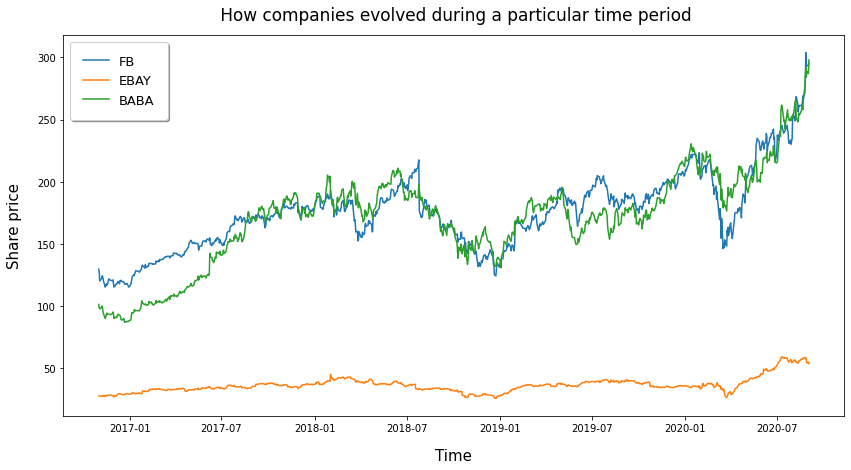

In [169]:

params = {'legend.fontsize': 13, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.figure(figsize=(14, 7))
plt.plot(index, adj_close)
plt.title(" How companies evolved during a particular time period",fontsize=17, pad = 15)
plt.xlabel("Time",fontsize=15,labelpad=15)
plt.ylabel("Share price",fontsize=15,labelpad=15)
plt.legend(companies, loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1) 
plt.show()

In [170]:
log_returns = np.log(adj_close/adj_close.shift(1))
log_returns

Symbols,FB,EBAY,BABA
Date,,,
2016-11-01,NaN,NaN,NaN
2016-11-02,-0.018156,-0.004237,-0.026446
2016-11-03,-0.058033,-0.007102,-0.007745
2016-11-04,0.006231,-0.003928,-0.001843
2016-11-07,0.011528,0.010322,0.018079
...,...,...,...
2020-08-26,0.079018,0.009089,0.020625
2020-08-27,-0.035808,-0.039521,-0.027044
2020-08-28,0.001499,-0.036901,0.016854


In [171]:
log_returns.mean() * 252

Symbols
FB      0.215608
EBAY    0.173300
BABA    0.282451
dtype: float64

In [172]:
log_returns.cov() * 252

Symbols,FB,EBAY,BABA
Symbols,,,
FB,0.114013,0.034305,0.056576
EBAY,0.034305,0.076332,0.033349
BABA,0.056576,0.033349,0.105324


In [173]:
log_returns.corr()

Symbols,FB,EBAY,BABA
Symbols,,,
FB,1.000000,0.367732,0.516285
EBAY,0.367732,1.000000,0.371929
BABA,0.516285,0.371929,1.000000


In [174]:
portfolio_returns = []
portfolio_volatilities = []
for x in range(10000):
    weights = np.random.random(len(companies))
    weights /= np.sum(weights)
    
    portfolio_returns.append(np.sum(weights * log_returns.mean()) * 252)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 252, weights))))
                    
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)          

In [175]:
print(len(weights))

3


In [181]:
fig = px.scatter(x = portfolio_volatilities, y = portfolio_returns, width=1200, height=750)
fig.update_layout(xaxis_title = "Expected Volatility", yaxis_title = "Expected Return")
fig.update_traces(marker=dict(size = 2))
fig.show()  